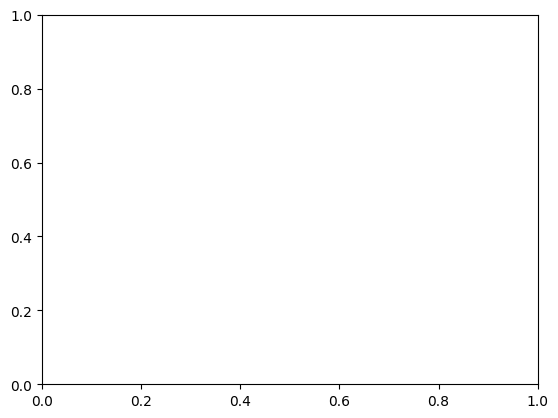

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def NFD(pnow,pold,h,dt):
    return 2*pnow[1:-1] - pold[1:-1] + (dt**2)*(h**-2)*np.diff(pnow,2)

def FDTD(v,w,h,dt): #Leapfrog
    w = w + dt/h*np.diff(v)
    v[1:-1] = v[1:-1] + dt/h*np.diff(w)
    return v,w

Nx = 100; # Points of discretization
tmax = 10; # endtime
m = 0.1; # Multiple for dt
x = np.linspace(-0.5,0.5,Nx); # x grid
h = abs(x[2]-x[1]);
dt = m*h;
t = np.arange(0,10,dt) # time grid

# Classic FDTD approach
v = np.zeros([len(t),len(x)])
v[0,:]=0
w = np.zeros([len(t),len(x)-1])
w[0,:]=-np.pi*np.sin(np.pi*(x[1:]+h/2))
for i in range(len(t)-1):
    v[i+1],w[i+1] = FDTD(v[i],w[i],h,dt)

ana = np.zeros([len(t),len(x)])
for i in range(len(t)):
    ana[i] = -np.pi*np.cos(np.pi*x)*np.sin(np.pi*t[i])

fig = plt.figure();
ax = fig.add_subplot()

def update(i):
    ax.clear()
    ax.plot(x,v[i,:])
    ax.plot(x,ana[i,:])
    ax.set_xlim(-0.5, 0.5)
    ax.set_ylim(-4, 4)
    ax.set_xlabel('x')
    ax.set_ylabel('$\cos(\pi$x)')
    ax.text(0.35,0.9,f't = {round(t[i],2)}',fontsize='12')
    ax.legend(['FDTD','Analytical'],loc='upper left')
    ax.grid()

ani = animation.FuncAnimation(fig, update,frames = np.arange(0, len(t), round(1/m)*5), interval = 33.3)
plt.show()

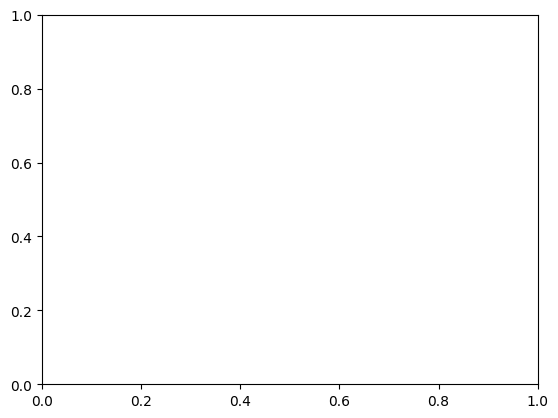

In [2]:
# Naive finite differences
pnow = np.zeros([len(t),len(x)])
pnow[0,:]=np.cos(np.pi*x); # Initialize
pold=np.cos(np.pi*x);
for i in range(len(t)-1):
    pnew = NFD(pnow[i,:],pold,h,dt)
    pold = pnow[i,:];
    pnow[i+1,1:-1] = pnew;

ana = np.zeros([len(t),len(x)])
for i in range(len(t)):
    ana[i] = np.cos(np.pi*x)*np.cos(np.pi*t[i])

fig = plt.figure();
ax = fig.add_subplot()

def update(i):
    ax.clear()
    ax.plot(x,pnow[i,:])
    ax.plot(x,ana[i,:])
    ax.set_xlim(-0.5, 0.5)
    ax.set_ylim(-1, 1)
    ax.set_xlabel('x')
    ax.set_ylabel('$\cos(\pi$x)')
    ax.text(0.35,0.9,f't = {round(t[i],2)}',fontsize='12')
    ax.legend(['FDTD','Analytical'],loc='upper left')
    ax.grid()

ani = animation.FuncAnimation(fig, update,frames = np.arange(0, len(t), 100), interval = 33.3)
plt.show()

C:\Users\Stefan\AppData\Roaming\Python\Python311\site-packages\matplotlib\animation.py:880: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


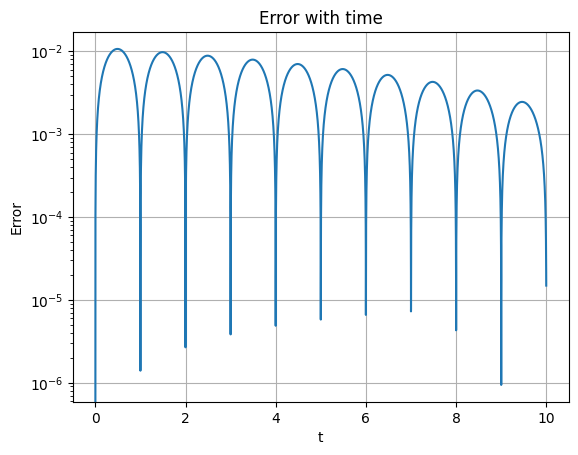

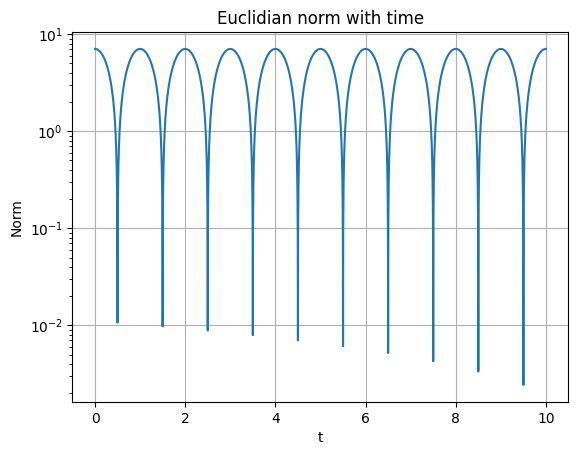

In [3]:
# Error and Norm
TimeError = np.linalg.norm(pnow - ana,axis=1)
Norm = np.linalg.norm(pnow,axis=1)
fig2 = plt.figure();
ax = fig2.add_subplot()
ax.semilogy(t,TimeError)
ax.set_xlabel('t')
ax.set_ylabel('Error')
ax.set_title('Error with time') # Error is largest when the change is largest and lowest at the maxima (lowest change)
ax.grid()

fig3 = plt.figure();
ax = fig3.add_subplot()
ax.semilogy(t,Norm)
ax.set_xlabel('t')
ax.set_ylabel('Norm')
ax.set_title('Euclidian norm with time')
ax.grid()